Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
train = pd.read_csv(r"C:\Users\neetac1973\Downloads\SalaryData_Train.csv")

In [4]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test = pd.read_csv(r"C:\Users\neetac1973\Downloads\SalaryData_Test.csv")

In [5]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
train.info() #gives information about train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
test.info()  #gives information about test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train.describe() #describes train dataset

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
test.describe() #describes test dataset

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
test['maritalstatus'].value_counts() # returns a Series that contain counts of unique values

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [11]:
test['age'].value_counts()

35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
89      1
87      1
84      1
Name: age, Length: 73, dtype: int64

In [12]:
test['occupation'].value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [15]:
test[test.duplicated()].shape # returns Series with True and False values 

(930, 14)

In [16]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [20]:
Test =test.drop_duplicates() #removes duplicate rows

In [19]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [21]:
train['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [23]:
train['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [25]:
train['capitalgain'].value_counts()

0        27623
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64

In [26]:
train[train.duplicated()].shape 

(3258, 14)

In [27]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [28]:
Train =train.drop_duplicates()

In [29]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [30]:
Train.isnull().sum() #returns the number of missing values in the dataset.

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [31]:
Test.isnull().sum() #returns the number of missing values in the dataset.

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [32]:
Train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [33]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [35]:
pd.crosstab(Train['occupation'],Train['Salary']) #Compute a simple cross tabulation of two (or more) factors.

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


In [36]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


In [37]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,309,9,62,175,8,22,14,34,0,165,27,14,66,24
Local-gov,277,0,139,211,28,46,11,187,0,667,291,7,38,112
Private,2378,0,2391,2333,430,1064,1581,2370,141,2042,185,2530,669,1099
Self-emp-inc,28,0,97,369,51,2,10,27,0,156,5,275,3,26
Self-emp-not-inc,49,0,487,375,419,15,35,173,0,360,6,368,26,118
State-gov,247,0,52,183,15,9,13,122,0,393,112,11,56,40
Without-pay,3,0,1,0,6,1,1,1,0,0,0,0,0,1


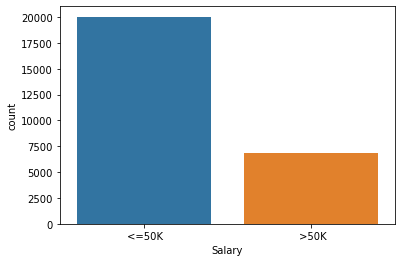

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [39]:
sns.countplot(x='Salary',data= Train) # to represent the occurrence(counts) of the observation present in the categorical variable
#sns: a histogram across a categorical, instead of quantitative, variable.
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

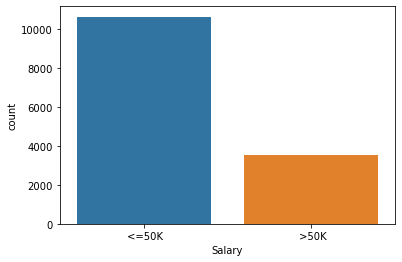

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [40]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

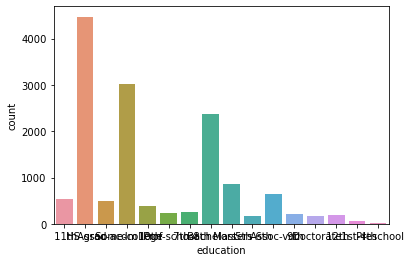

 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [43]:
sns.countplot(x='education',data= Test)
plt.xlabel('education')
plt.ylabel('count')
plt.show()
Test['education'].value_counts()

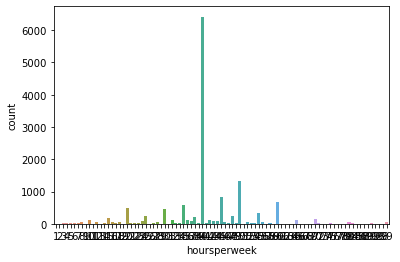

40    6417
50    1312
45     831
60     662
35     575
      ... 
73       1
76       1
79       1
89       1
69       1
Name: hoursperweek, Length: 89, dtype: int64

In [44]:
sns.countplot(x='hoursperweek',data= Test)
plt.xlabel('hoursperweek')
plt.ylabel('count')
plt.show()
Test['hoursperweek'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='workclass'>

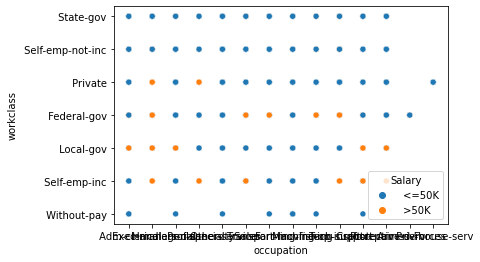

In [45]:
sns.scatterplot(Train['occupation'],Train['workclass'],hue=Train['Salary'])
#determines which column in the data frame should be used for colour encoding

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus', ylabel='workclass'>

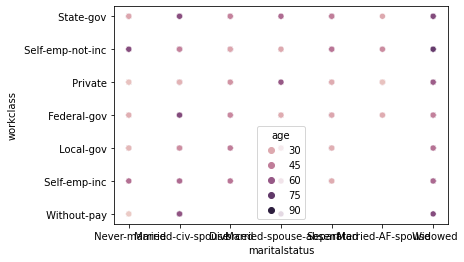

In [46]:
sns.scatterplot(Train['maritalstatus'],Train['workclass'],hue=Train['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='native'>

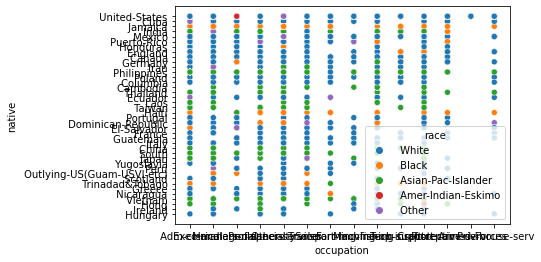

In [47]:
sns.scatterplot(Train['occupation'],Train['native'],hue=Train['race'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educationno', ylabel='capitalloss'>

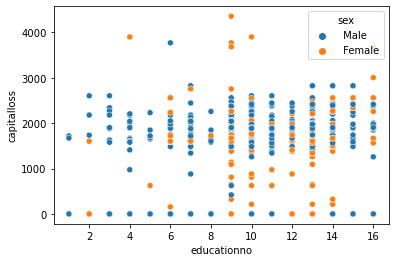

In [48]:
sns.scatterplot(Train['educationno'],Train['capitalloss'],hue=Train['sex'])

<AxesSubplot:xlabel='education'>

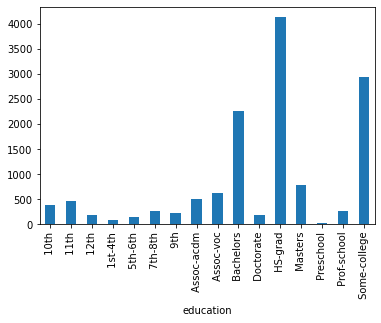

In [49]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

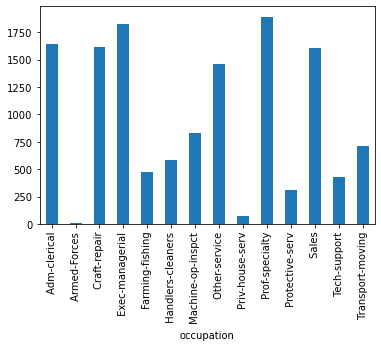

In [50]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

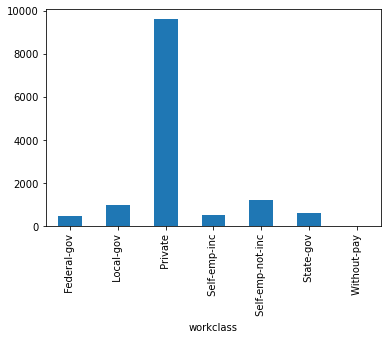

In [51]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

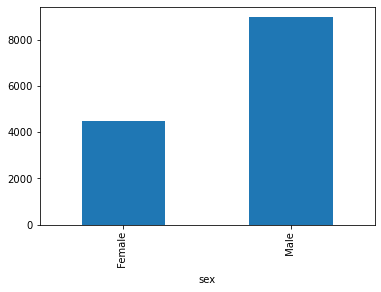

In [52]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

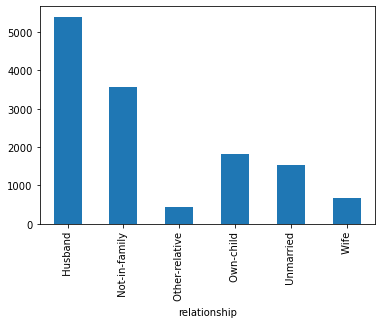

In [53]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

In [54]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [55]:
string_columns

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [59]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native","age","educationno","hoursperweek"]

In [60]:
string_columns

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'age',
 'educationno',
 'hoursperweek']

In [61]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])


C:\Users\neetac1973\AppData\Local\Temp\ipykernel_14052\4261947270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[i]= number.fit_transform(Train[i])
C:\Users\neetac1973\AppData\Local\Temp\ipykernel_14052\4261947270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i]=number.fit_transform(Test[i])


In [62]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,2174,0,39,37,<=50K
1,33,4,9,12,2,3,0,4,1,0,0,12,37,<=50K
2,21,2,11,8,0,5,1,4,1,0,0,39,37,<=50K
3,36,2,1,6,2,5,0,2,1,0,0,39,37,<=50K
4,11,2,9,12,2,9,5,2,0,0,0,39,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,13,2,3,0,4,1,0,0,39,37,>50K
30155,5,2,15,9,4,10,1,4,1,0,0,39,37,<=50K
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,<=50K
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,<=50K


In [63]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,<=50K
1,21,2,11,8,2,4,0,4,1,0,0,49,37,<=50K
2,11,1,7,11,2,10,0,4,1,0,0,39,37,>50K
3,27,2,15,9,2,6,0,2,1,7688,0,39,37,>50K
4,17,2,0,5,4,7,1,4,1,0,0,29,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,<=50K
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,<=50K
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,<=50K
15058,27,2,9,12,0,0,3,1,1,5455,0,39,37,<=50K


In [65]:
##Capturing the column names which can help in futher process
colnames = Train.columns # returns or sets the names of the columns in a data frame.
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [70]:
len(colnames) 

14

In [71]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,2174,0,39,37,<=50K
1,33,4,9,12,2,3,0,4,1,0,0,12,37,<=50K
2,21,2,11,8,0,5,1,4,1,0,0,39,37,<=50K
3,36,2,1,6,2,5,0,2,1,0,0,39,37,<=50K
4,11,2,9,12,2,9,5,2,0,0,0,39,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,13,2,3,0,4,1,0,0,39,37,>50K
30155,5,2,15,9,4,10,1,4,1,0,0,39,37,<=50K
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,<=50K
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,<=50K


In [72]:
colnames = Test.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [73]:
len(colnames)

14

In [74]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,<=50K
1,21,2,11,8,2,4,0,4,1,0,0,49,37,<=50K
2,11,1,7,11,2,10,0,4,1,0,0,39,37,>50K
3,27,2,15,9,2,6,0,2,1,7688,0,39,37,>50K
4,17,2,0,5,4,7,1,4,1,0,0,29,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,<=50K
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,<=50K
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,<=50K
15058,27,2,9,12,0,0,3,1,1,5455,0,39,37,<=50K


In [75]:
Test['maritalstatus'].value_counts()

2    6490
4    4501
0    2026
5     470
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [76]:
Train['age'].value_counts()

14    769
19    757
16    748
17    743
20    740
     ... 
65      7
66      5
70      3
68      3
69      1
Name: age, Length: 72, dtype: int64

In [79]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
#when data is divided into two or more subsets
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [80]:
x_train

array([[22,  5,  9, ...,  0, 39, 37],
       [33,  4,  9, ...,  0, 12, 37],
       [21,  2, 11, ...,  0, 39, 37],
       ...,
       [10,  2,  7, ...,  0, 37, 37],
       [41,  2, 11, ...,  0, 39, 37],
       [35,  3, 11, ...,  0, 39, 37]], dtype=int64)

In [81]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [82]:
x_test

array([[ 8,  2,  1, ...,  0, 39, 37],
       [21,  2, 11, ...,  0, 49, 37],
       [11,  1,  7, ...,  0, 39, 37],
       ...,
       [21,  2,  9, ...,  0, 49, 37],
       [27,  2,  9, ...,  0, 39, 37],
       [18,  3,  9, ...,  0, 59, 37]], dtype=int64)

In [83]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [89]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [90]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [91]:
x_train

array([[2.200022e-04, 5.000050e-05, 9.000090e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [3.300033e-04, 4.000040e-05, 9.000090e-05, ..., 0.000000e+00,
        1.200012e-04, 3.700037e-04],
       [2.100021e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       ...,
       [1.000010e-04, 2.000020e-05, 7.000070e-05, ..., 0.000000e+00,
        3.700037e-04, 3.700037e-04],
       [4.100041e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [3.500035e-04, 3.000030e-05, 1.100011e-04, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04]])

In [92]:
x_test

array([[8.000080e-05, 2.000020e-05, 1.000010e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [2.100021e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.900049e-04, 3.700037e-04],
       [1.100011e-04, 1.000010e-05, 7.000070e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       ...,
       [2.100021e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        4.900049e-04, 3.700037e-04],
       [2.700027e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [1.800018e-04, 3.000030e-05, 9.000090e-05, ..., 0.000000e+00,
        5.900059e-04, 3.700037e-04]])

In [93]:
def norm_func(i):
    y = (i-i.min())/(i.max()-i.min())
    return (y)

In [95]:
y_train = norm_func(x_train)
y_test =  norm_func(x_test)

In [96]:
y_train

array([[2.200022e-04, 5.000050e-05, 9.000090e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [3.300033e-04, 4.000040e-05, 9.000090e-05, ..., 0.000000e+00,
        1.200012e-04, 3.700037e-04],
       [2.100021e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       ...,
       [1.000010e-04, 2.000020e-05, 7.000070e-05, ..., 0.000000e+00,
        3.700037e-04, 3.700037e-04],
       [4.100041e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [3.500035e-04, 3.000030e-05, 1.100011e-04, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04]])

In [97]:
y_test

array([[8.000080e-05, 2.000020e-05, 1.000010e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [2.100021e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.900049e-04, 3.700037e-04],
       [1.100011e-04, 1.000010e-05, 7.000070e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       ...,
       [2.100021e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        4.900049e-04, 3.700037e-04],
       [2.700027e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        3.900039e-04, 3.700037e-04],
       [1.800018e-04, 3.000030e-05, 9.000090e-05, ..., 0.000000e+00,
        5.900059e-04, 3.700037e-04]])